# Tensorflow intro

In [1]:
import tensorflow as tf

C:\Users\nyrik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nyrik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nyrik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nyrik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
hello=tf.constant("Hello world!")

In [3]:
sess=tf.Session()

result=sess.run(hello)
print(result)

sess.close()

b'Hello world!'


In [4]:
with tf.Session() as sess: #точно так же можно сделать с помощью стандартного контескстного 
    resutl=sess.run(hello) #менеджера
    print(result)

b'Hello world!'


In [5]:
a=tf.constant(2)
b=tf.constant(3)

c=tf.constant([1,2,3,4])
d=tf.constant([2,3,4,5])

In [8]:
with tf.Session() as sess:
    print("a={}, b={}, c={}, d={}\n".format(
        sess.run(a), sess.run(b),
        sess.run(c), sess.run(d)
    ))
    print("a + b={}\n"
          "a * b={}".format(sess.run(a+b), sess.run(a*b)))
    
    print("c + d={}\n"
          "c * d={}".format(sess.run(c+d), sess.run(c*d)))

a=2, b=3, c=[1 2 3 4], d=[2 3 4 5]

a + b=5
a * b=6
c + d=[3 5 7 9]
c * d=[ 2  6 12 20]


In [9]:
a=tf.placeholder(tf.int16)
b=tf.placeholder(tf.int16)

In [10]:
add=tf.add(a,b)
mul=tf.multiply(a,b)

In [11]:
with tf.Session() as sess:
    writer=tf.summary.FileWriter("logs", sess.graph)
    
    print("a + b={}".format(sess.run(add, feed_dict={a:3, b:1})))
    print("a * b={}".format(sess.run(add, feed_dict={a:7, b:8})))

a + b=4
a * b=15


In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
from sklearn.datasets import make_regression

n_samples=42

x_train, y_train=make_regression(
    n_samples=n_samples, n_features=1,
    noise=15, random_state=7
)
#Нормализуем, что бы обучать нашу модель:
x_train=(x_train-x_train.mean())/ x_train.std()
y_train=(y_train-y_train.mean())/ y_train.std()

In [16]:
print(x_train[:5])

[[ 0.03264883]
 [ 2.00453732]
 [-0.09529635]
 [-0.29220736]
 [ 0.19354651]]


In [17]:
X=tf.placeholder("float")
Y=tf.placeholder("float")

#Создадим две переменные, переменные в отличие от константы-значения в
#вычислительном графе которые могут менять свое значение

W=tf.Variable(np.random.randn(), name="weight")
b=tf.Variable(np.random.randn(), name="bias")

In [18]:
prediction=tf.add(tf.multiply(X,W),b)

In [20]:
#Создадим еще один плэйсхолдер, который будет отвечать как наша модель изменяет веса
learning_rate=tf.placeholder(tf.float32, shape=[])

#вычисляем функцию потерь
cost=tf.reduce_sum(tf.pow(prediction -Y, 2)) / n_samples

#будем обучать с помощью градиент.спуска с определенным лернинг рейтом и минимизируя функцию потерь
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
#инициализируем глобальную переменную
init=tf.global_variables_initializer()

In [24]:
#Осталось только запустить нашу сессию и обучать нашу модель
epochs=1000
sess=tf.Session()
sess.run(init)

lr=0.1
for epoch in range(epochs):
    for (x_batch,y_batch) in zip(x_train,y_train):
        sess.run(optimizer, feed_dict={X: x_batch, Y: y_batch, learning_rate: lr})
        
    if epoch % 100==0:
            lr /= 2
            c=sess.run(cost, feed_dict={X: x_train, Y: y_train})
            print("Epoch #{}: cost={}".format(epoch, c))


Epoch #0: cost=199.7534637451172
Epoch #100: cost=67.62767791748047
Epoch #200: cost=67.46199798583984
Epoch #300: cost=67.3815689086914
Epoch #400: cost=67.34588623046875
Epoch #500: cost=67.32942962646484
Epoch #600: cost=67.32154083251953
Epoch #700: cost=67.31766510009766
Epoch #800: cost=67.31455993652344
Epoch #900: cost=67.31415557861328


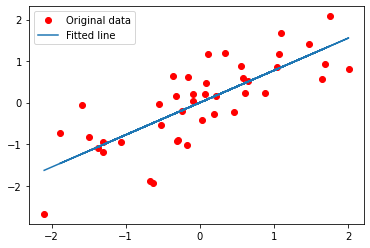

In [27]:
#наша модель обучилась давайте посмотрим насколько хорошо она описала данные
plt.plot(x_train, y_train, "ro", label="Original data")
plt.plot(x_train, sess.run(W)*x_train+sess.run(b), label="Fitted line")
plt.legend()
plt.show()

In [28]:
sess.close()

# Tensorflow MNIST

Классификация изображений на tensorflow

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

C:\Users\nyrik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nyrik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nyrik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nyrik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


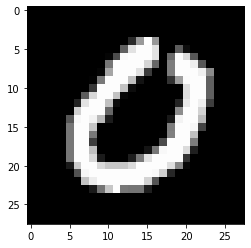

In [2]:
mnist=input_data.read_data_sets("/tmp/data/", one_hot=True)

image=mnist.train.images[7].reshape([28,28]);
plt.gray()
plt.imshow(image)

In [3]:
print(mnist.train.images[7].shape)
print(mnist.train.labels[7].shape)

(784,)
(10,)


In [4]:
print(mnist.train.images[7][150:200])

[0.         0.         0.37254903 0.8862746  0.9921569  0.9921569
 0.8862746  0.         0.         0.36078432 0.0509804  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01960784 0.29803923
 0.97647065 0.9921569  0.9921569  0.9921569  0.8862746  0.
 0.41176474 0.9843138  0.854902   0.34117648 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [5]:
print(mnist.train.labels[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [6]:
learning_rate=0.1
epochs=1000
#бэтч сайз это сколько будем передавать обьектов в единицу обучения нашей неронной сети
batch_size=128

#На первом скрытом слое будет 256 нейронов
n_hidden_1=256
#На втором тоже будет 256 нейронов
n_hidden_2=256
num_input=784 #28x28 передается как один вектор
num_classes=10

X=tf.placeholder("float", [None, num_input])
Y=tf.placeholder("float", [None, num_classes])

In [9]:
#Определим параметры нейронной сети, ее конфигурацию
weights={
    "h1": tf.Variable(tf.random_normal([num_input , n_hidden_1])),
    "h2": tf.Variable(tf.random_normal([n_hidden_1 ,n_hidden_2])),
    "output": tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases={
    "b1":tf.Variable(tf.random_normal([n_hidden_1])),
    "b2":tf.Variable(tf.random_normal([n_hidden_2])),
    "output":tf.Variable(tf.random_normal([num_classes]))
}


In [11]:
#эта функция и будет нашец нейронной сетью
def network(x):
    layer_1=tf.add(tf.matmul(x,weights["h1"]), biases["b1"])
    layer_2=tf.add(tf.matmul(layer_1, weights["h2"]), biases["b2"])
    output_layer=tf.matmul(layer_2, weights["output"]) + biases["output"]
    
    return  output_layer

In [13]:
#теперь нужно обучить нейронную сеть через функцию потерь
#наша нейронка выдает какое то распределение над классами то есть лоджиты
logits=network(X)

loss=tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=Y
    )
)

optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
train=optimizer.minimize(loss)

correct_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init=tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        batch_x, batch_y=mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={X: batch_x, Y: batch_y})
        
        if epoch %50==0:
            train_accuracy=sess.run(
                accuracy,
                feed_dict={
                    X: mnist.train.images,
                    Y: mnist.train.labels
                }
            )
            
            print("Epoch #{}: train_accuracy={}".format(epoch, train_accuracy))
            
    print("Test accuracy={}".format(
        sess.run(
            accuracy,
            feed_dict={
                X:mnist.test.images,
                Y:mnist.test.labels
            }
        )
    ))  

Epoch #0: train_accuracy=0.342163622379303
Epoch #50: train_accuracy=0.862709105014801
Epoch #100: train_accuracy=0.8171091079711914
Epoch #150: train_accuracy=0.8415818214416504
Epoch #200: train_accuracy=0.8793272972106934
Epoch #250: train_accuracy=0.8449272513389587
Epoch #300: train_accuracy=0.8747272491455078
Epoch #350: train_accuracy=0.8675090670585632
Epoch #400: train_accuracy=0.8600000143051147
Epoch #450: train_accuracy=0.8703091144561768
Epoch #500: train_accuracy=0.8564363718032837
Epoch #550: train_accuracy=0.8541818261146545
Epoch #600: train_accuracy=0.858018159866333
Epoch #650: train_accuracy=0.8395454287528992
Epoch #700: train_accuracy=0.8542909026145935
Epoch #750: train_accuracy=0.8447818160057068
Epoch #800: train_accuracy=0.8437091112136841
Epoch #850: train_accuracy=0.8373454809188843
Epoch #900: train_accuracy=0.838272750377655
Epoch #950: train_accuracy=0.8329272866249084
Test accuracy=0.8222000002861023


# Keras MNIST
тоже самое только через керас

In [15]:
tf.__version__

'1.14.0'

In [16]:
batch_size=128
num_classes=10
epochs=2

(x_train, y_train),(x_test, y_test)=tf.keras.datasets.mnist.load_data()

x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

x_train/=255
x_test/=255

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train=tf.keras.utils.to_categorical(y_train, num_classes)
y_test=tf.keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 2s 0us/step
60000 train samples
10000 test samples


In [18]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512,activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

_=model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test,y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2481 - acc: 0.9253 - val_loss: 0.1110 - val_acc: 0.9662
Epoch 2/2
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0998 - acc: 0.9690 - val_loss: 0.0892 - val_acc: 0.9731


In [20]:
loss, accuracy=model.evaluate(x_test,y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 0.08916003481862135
Test accuracy: 0.9731
